# Kollokasjoner


In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import pandas as pd

### Litt kode for styling - forstørre fonter i notebook

In [3]:
mu.css()

In [7]:
%%HTML
<style>
p {font-size:1.4em}
</style>

# Analyse

I python er det litt enklere å jobbe med variabler. De setter vi på venstre side av likhetstegnet, og lar definisjonen stå på høyre side.

In [9]:
kollokasjonsord = 'journalistikk'
startår = 1950
sluttår = 1955

Neste kommando lager kollokasjonen for det ordet for en periode. Merk at vi har brukt variabelnavnene i oppbyggingen av kollokasjonen

In [10]:
coll = nb.collocation(kollokasjonsord, yearfrom = startår, yearto = sluttår, corpus = 'avis', before = 5, after = 5)

Neste trinn består i å set på kollokasjonsdataene, om det er mye data, eller lite

In [13]:
# antall ord
coll.sum()

0    12650
dtype: int64

In [20]:
coll_tot = coll.sum()

Vi kan sammenligne med en referanse, bruker normalen fra bøker.

In [14]:
ref = nb.frame(nb.totals(150000))

Tolkning gjøres litt lettere om frekvenstallen normaliseres til proporsjoner, altså at tallene står for prosenter

In [19]:
nb.normalize_corpus_dataframe(ref)
ref = ref * 100 # gangr med 100 for prosent

In [21]:
nb.normalize_corpus_dataframe(coll)
coll = coll * 100

Lager en variabel `assoc`for å lagre de viktigste ordene

In [22]:
assoc = nb.frame_sort(nb.frame(coll[0]/ref[0]))

Forskjellene blir noe forstørret når det er lite data i kollokasjonen. 

In [23]:
assoc.head(20)

,0
Arbeiderbladets,2006.931028
Dagbladets,1466.084626
vederheftig,1270.960613
forlagsvirksomhet,1147.620175
fodes,1096.961220
forfatter-,1077.285531
gangster,909.199405
Betingelsene,866.189885
uansvarlig,813.405483
sjofle,756.327737


## Studiet av forhåndsdefineret nøkkelord

In [24]:
nøkkelord = ["journalist", "redaktør", "journalisten", "readaktøren", "sport", "utenriks", "innenrik"]

Først ser vi på hvordan forskjellene er, dernest på frekvensen

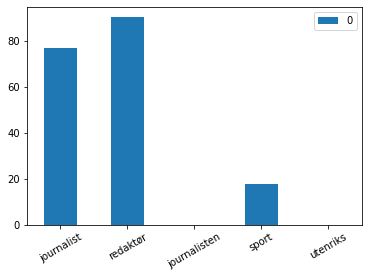

In [27]:
assoc.loc[[x for  x in nøkkelord if x in assoc.index]].plot(kind='bar', rot=30)

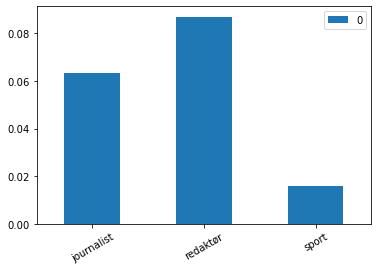

In [29]:
coll.loc[[x for  x in nøkkelord if x in coll.index]].plot(kind='bar', rot=30)